In [1]:
# pip install yfinance


# **Importing Libraries**
We start by importing the libraries we are going to use for this project


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import entropy

In [3]:
ticker = input( "Nasdaq : ")
data = yf.download(ticker, start="2022-10-01", end="2023-9-30")

Nasdaq : ^IXIC
[*********************100%%**********************]  1 of 1 completed


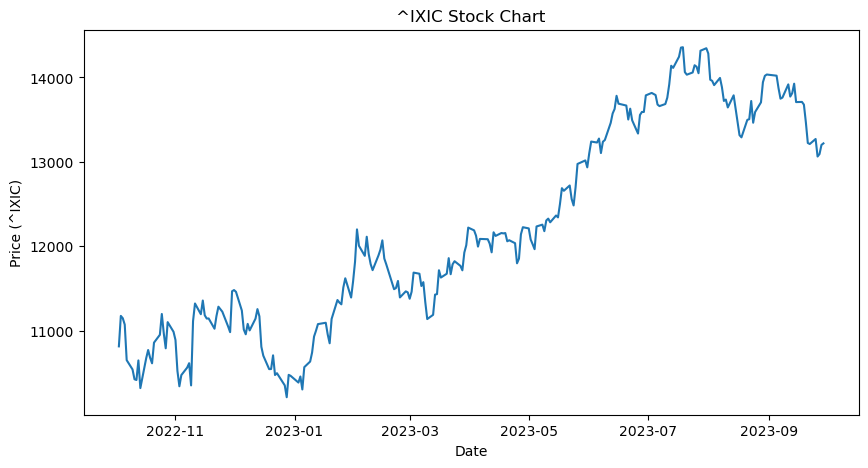

In [4]:
plt.figure(figsize= (10, 5))
plt.plot (data["Close"])
plt.title(f"{ticker} Stock Chart")
plt.xlabel ("Date") 
plt.ylabel("Price (^IXIC)")
plt.show()

# Candle chart

In [5]:
import mplfinance as mpf

In [6]:
stock_data = yf.download(ticker, start="2023-01-01", end="2023-10-16")

[*********************100%%**********************]  1 of 1 completed


In [7]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,12679.191724,12772.190350,12596.172500,12691.489000,12691.489000,4.934256e+09
std,1059.058372,1046.674738,1057.351097,1045.965802,1045.965802,7.321503e+08
min,10363.959961,10393.219727,10265.040039,10305.240234,10305.240234,2.902300e+09
25%,11855.589844,11962.690430,11739.049805,11823.959961,11823.959961,4.434070e+09
50%,12706.440430,12736.919922,12624.059570,12698.089844,12698.089844,4.840950e+09
75%,13645.370117,13720.330078,13561.839844,13660.719727,13660.719727,5.270600e+09
max,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,8.162210e+09


In [8]:
stock_data.info

<bound method DataFrame.info of                     Open          High           Low         Close  \
Date                                                                 
2023-01-03  10562.059570  10613.059570  10309.160156  10386.980469   
2023-01-04  10467.820312  10515.219727  10337.639648  10458.759766   
2023-01-05  10390.309570  10393.219727  10295.250000  10305.240234   
2023-01-06  10363.959961  10604.139648  10265.040039  10569.290039   
2023-01-09  10662.099609  10807.259766  10619.120117  10635.650391   
...                  ...           ...           ...           ...   
2023-10-09  13326.219727  13509.299805  13277.480469  13484.240234   
2023-10-10  13505.809570  13659.629883  13491.809570  13562.839844   
2023-10-11  13619.209961  13671.110352  13549.290039  13659.679688   
2023-10-12  13672.469727  13714.139648  13491.559570  13574.219727   
2023-10-13  13613.589844  13619.540039  13361.849609  13407.230469   

               Adj Close      Volume  
Date              

In [9]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,10562.059570,10613.059570,10309.160156,10386.980469,10386.980469,4780650000
2023-01-04,10467.820312,10515.219727,10337.639648,10458.759766,10458.759766,5085380000
2023-01-05,10390.309570,10393.219727,10295.250000,10305.240234,10305.240234,4764270000
2023-01-06,10363.959961,10604.139648,10265.040039,10569.290039,10569.290039,5199780000
2023-01-09,10662.099609,10807.259766,10619.120117,10635.650391,10635.650391,5132190000


In [10]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-09,13326.219727,13509.299805,13277.480469,13484.240234,13484.240234,3835930000
2023-10-10,13505.809570,13659.629883,13491.809570,13562.839844,13562.839844,4301350000
2023-10-11,13619.209961,13671.110352,13549.290039,13659.679688,13659.679688,4160440000
2023-10-12,13672.469727,13714.139648,13491.559570,13574.219727,13574.219727,4858620000
2023-10-13,13613.589844,13619.540039,13361.849609,13407.230469,13407.230469,4251550000


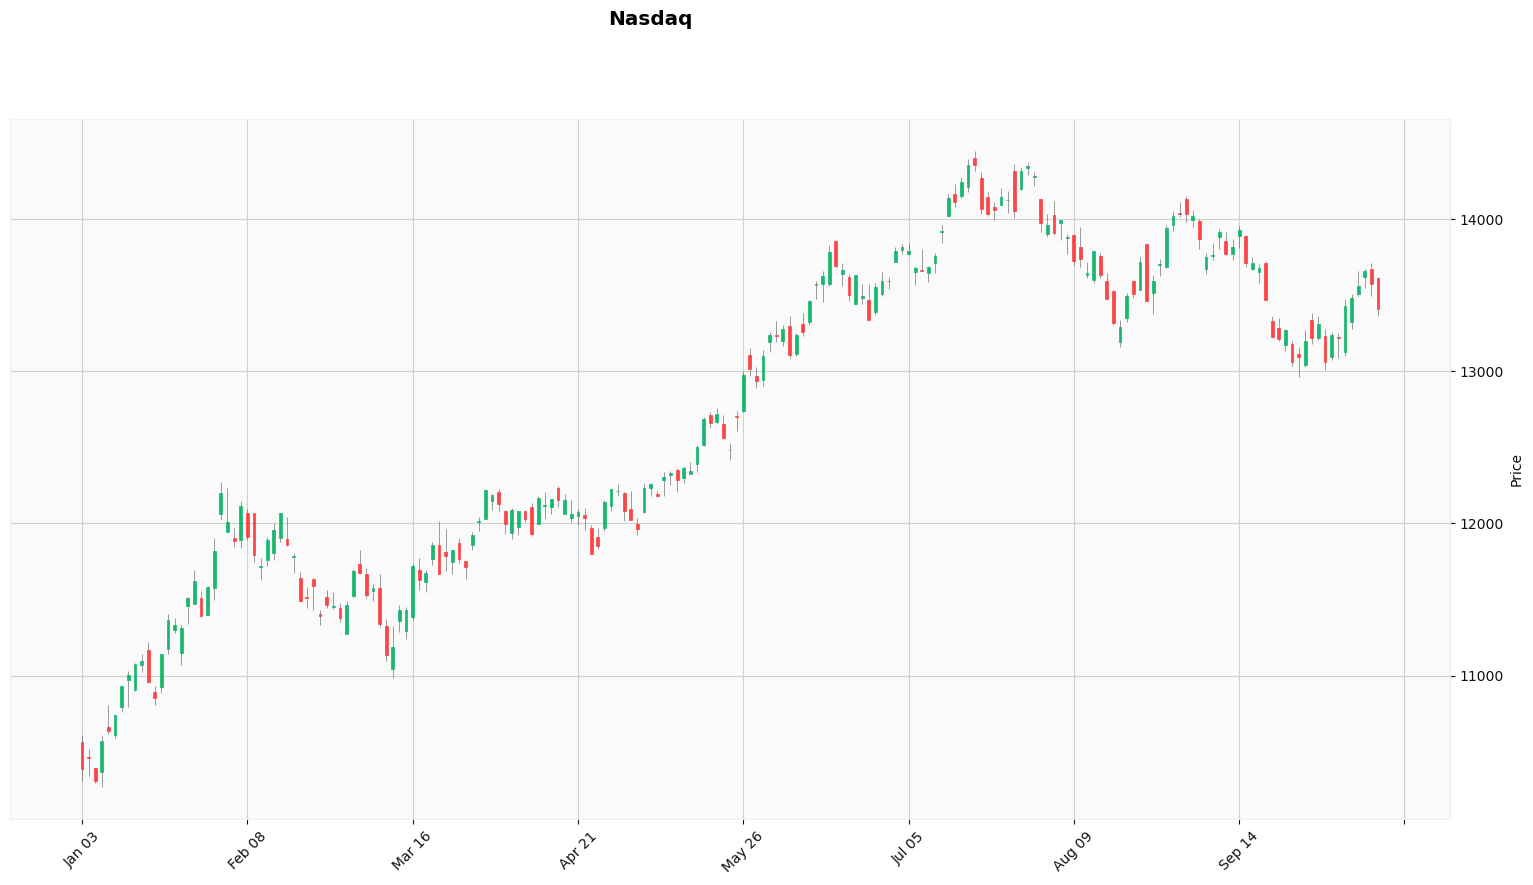

In [11]:
figsize = (20, 10)
mpf.plot (stock_data, type='candle', style='yahoo', title=f'Nasdaq', figsize=figsize)

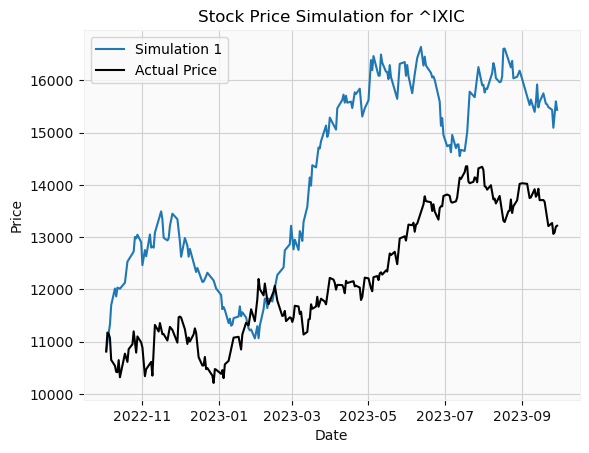

In [12]:
# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change().dropna()

# Define parameters for Brownian motion
mu = data['Daily_Return'].mean()
sigma = data['Daily_Return'].std()
dt = 1  # Time step in days (1 day)

# Simulate Brownian motion
np.random.seed(0)  # For reproducibility
num_days = len(data)
num_simulations = 1  # You can change this to simulate multiple paths
simulated_prices = []

for _ in range(num_simulations):
    prices = [data['Adj Close'].iloc[0]]
    for _ in range(num_days - 1):
        # Generate a random increment based on Brownian motion
        increment = np.random.normal(mu * dt, sigma * np.sqrt(dt))
        price = prices[-1] * np.exp(increment)
        prices.append(price)
    simulated_prices.append(prices)

# Plot the simulated price path
for i, prices in enumerate(simulated_prices):
    plt.plot(data.index, prices, label=f'Simulation {i + 1}')

# Plot the actual stock prices
plt.plot(data.index, data['Adj Close'], label='Actual Price', color='black')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price Simulation for {ticker}')
plt.show()

In [13]:
# pip install ordpy 

In [14]:
# pip install ordpy -- upgrade pip

# **Apple Stock**
Loading Apple's data using Yahoo Finance and then proceeding to simulate the Apple's stock price 

In [15]:
ticker1 = input( "Nasdaq : ")
data1 = yf.download(ticker, start="2022-10-01", end="2023-9-30")

Nasdaq : AAPL
[*********************100%%**********************]  1 of 1 completed


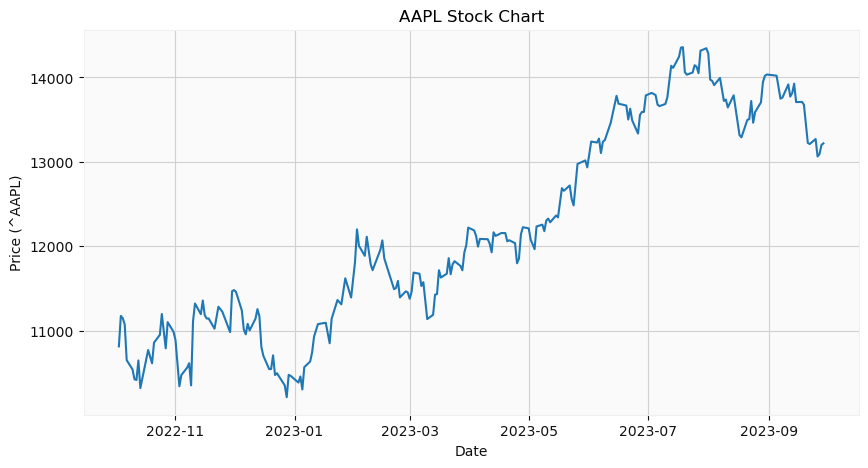

In [16]:
plt.figure(figsize= (10, 5))
plt.plot (data1["Close"])
plt.title(f"{ticker1} Stock Chart")
plt.xlabel ("Date") 
plt.ylabel("Price (^AAPL)")
plt.show()

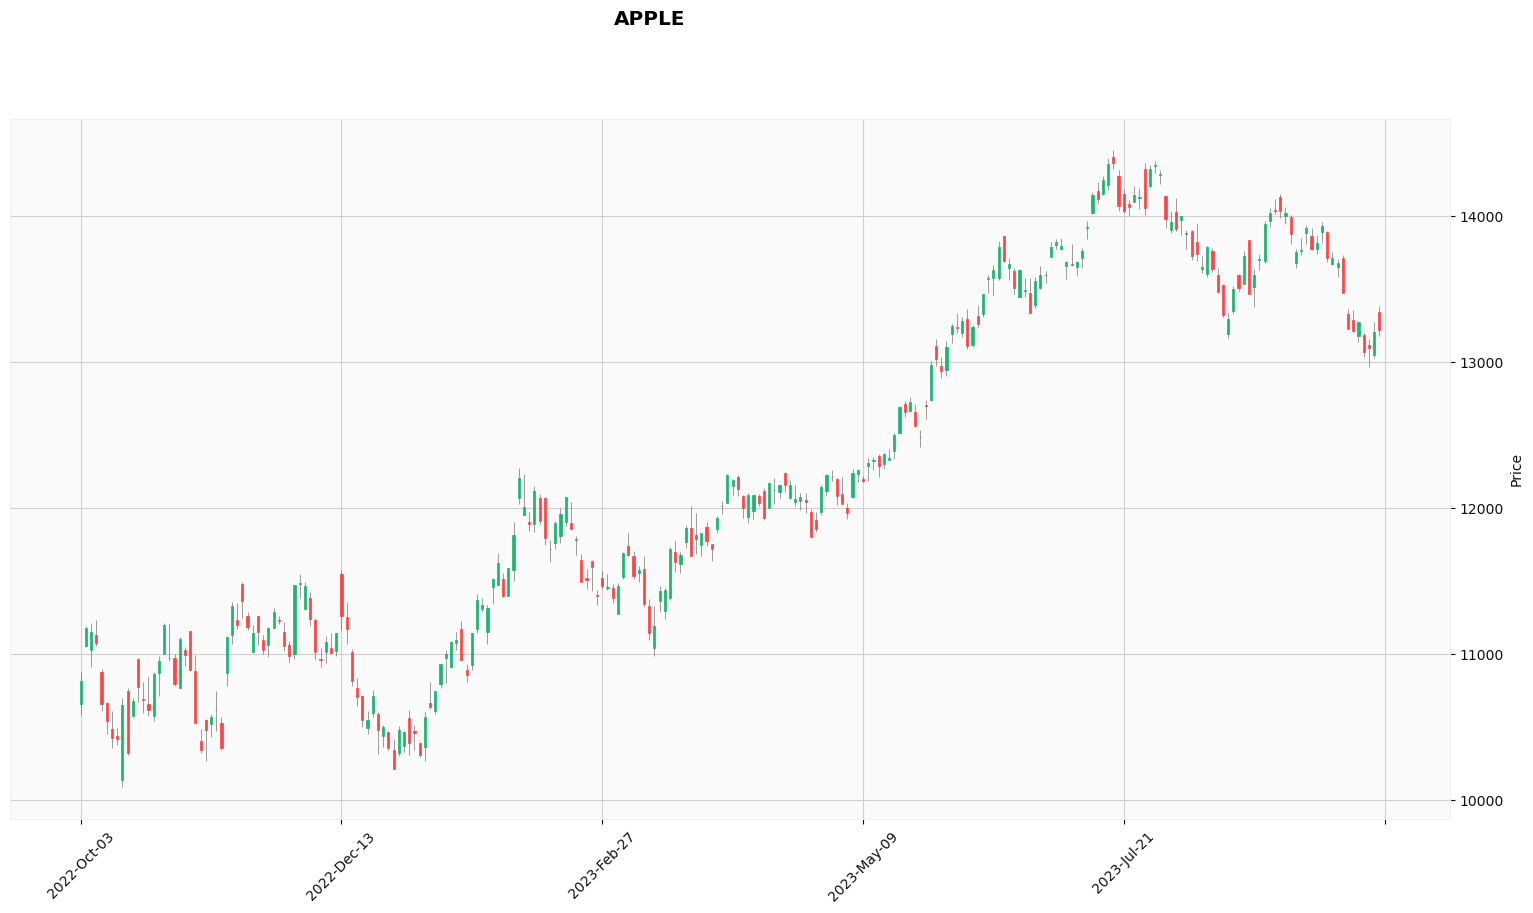

In [17]:
figsize = (20, 10)
mpf.plot (data1, type='candle', style='yahoo', title=f'APPLE', figsize=figsize)

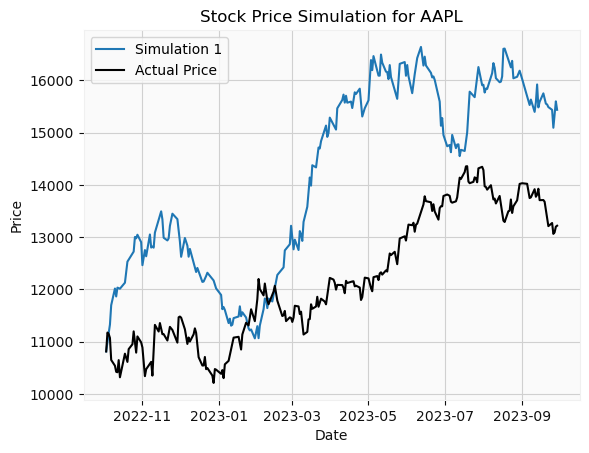

In [18]:
# Calculate daily returns
data1['Daily_Return'] = data1['Adj Close'].pct_change().dropna()

# Define parameters for Brownian motion
mu = data1['Daily_Return'].mean()
sigma = data1['Daily_Return'].std()
dt = 1  # Time step in days (1 day)

# Simulate Brownian motion
np.random.seed(0)  # For reproducibility
num_days = len(data1)
num_simulations = 1  # You can change this to simulate multiple paths
simulated_prices1 = []

for _ in range(num_simulations):
    prices = [data1['Adj Close'].iloc[0]]
    for _ in range(num_days - 1):
        # Generate a random increment based on Brownian motion
        increment = np.random.normal(mu * dt, sigma * np.sqrt(dt))
        price = prices[-1] * np.exp(increment)
        prices.append(price)
    simulated_prices1.append(prices)

# Plot the simulated price path
for i, prices in enumerate(simulated_prices1):
    plt.plot(data1.index, prices, label=f'Simulation {i + 1}')

# Plot the actual stock prices
plt.plot(data1.index, data1['Adj Close'], label='Actual Price', color='black')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price Simulation for {ticker1}')
plt.show()

# **Calculating our OPD, H and C**

Using our Nasdaq data from yfinance, we are going to define and determine our ordinal pattern (OPD), statistical complexity (C) and our shannon entropy (H)

In [19]:
def ordinal_pattern_distribution(Adj_Close, window_size):
    opd = {}  # Dictionary to store the counts of ordinal patterns
    
    for i in range(len(Adj_Close) - window_size + 1):
        window = Adj_Close[i:i+window_size]
        ordinal_pattern = tuple(np.argsort(window))
        
        if ordinal_pattern in opd:
            opd[ordinal_pattern] += 1
        else:
            opd[ordinal_pattern] = 1
    
    total_count = sum(opd.values())
    opd_prob = {pattern: count / total_count for pattern, count in opd.items()}
    
    return opd_prob

# Defining our timeseries
Adj_Close = data['Adj Close']

# Window size (d) - choose an appropriate window size
window_size = 3

# Calculate the ordinal pattern distribution
opd = ordinal_pattern_distribution(Adj_Close, window_size)

# Print the ordinal pattern distribution
for pattern, probability in opd.items():
    print(f"Pattern {pattern}: Probability {probability:.4f}")


Pattern (0, 2, 1): Probability 0.1210
Pattern (2, 1, 0): Probability 0.2460
Pattern (1, 0, 2): Probability 0.1452
Pattern (2, 0, 1): Probability 0.1290
Pattern (0, 1, 2): Probability 0.2540
Pattern (1, 2, 0): Probability 0.1048


In [20]:
# Create a DataFrame with the time series data
df = pd.DataFrame({'Adj Close': Adj_Close})


# Define a list of time delays (tau) to visualize
time_delays = [1, 2, 3, 4]

# Define Shannon entropy calculation function
def shannon_entropy(opd_prob):
    entropy = -sum(prob * np.log2(prob) for prob in opd_prob.values())
    return entropy

# Define statistical complexity calculation function
def statistical_complexity(opd_prob, shannon_entropy):
    complexity = -shannon_entropy / np.log2(len(opd_prob))
    return complexity


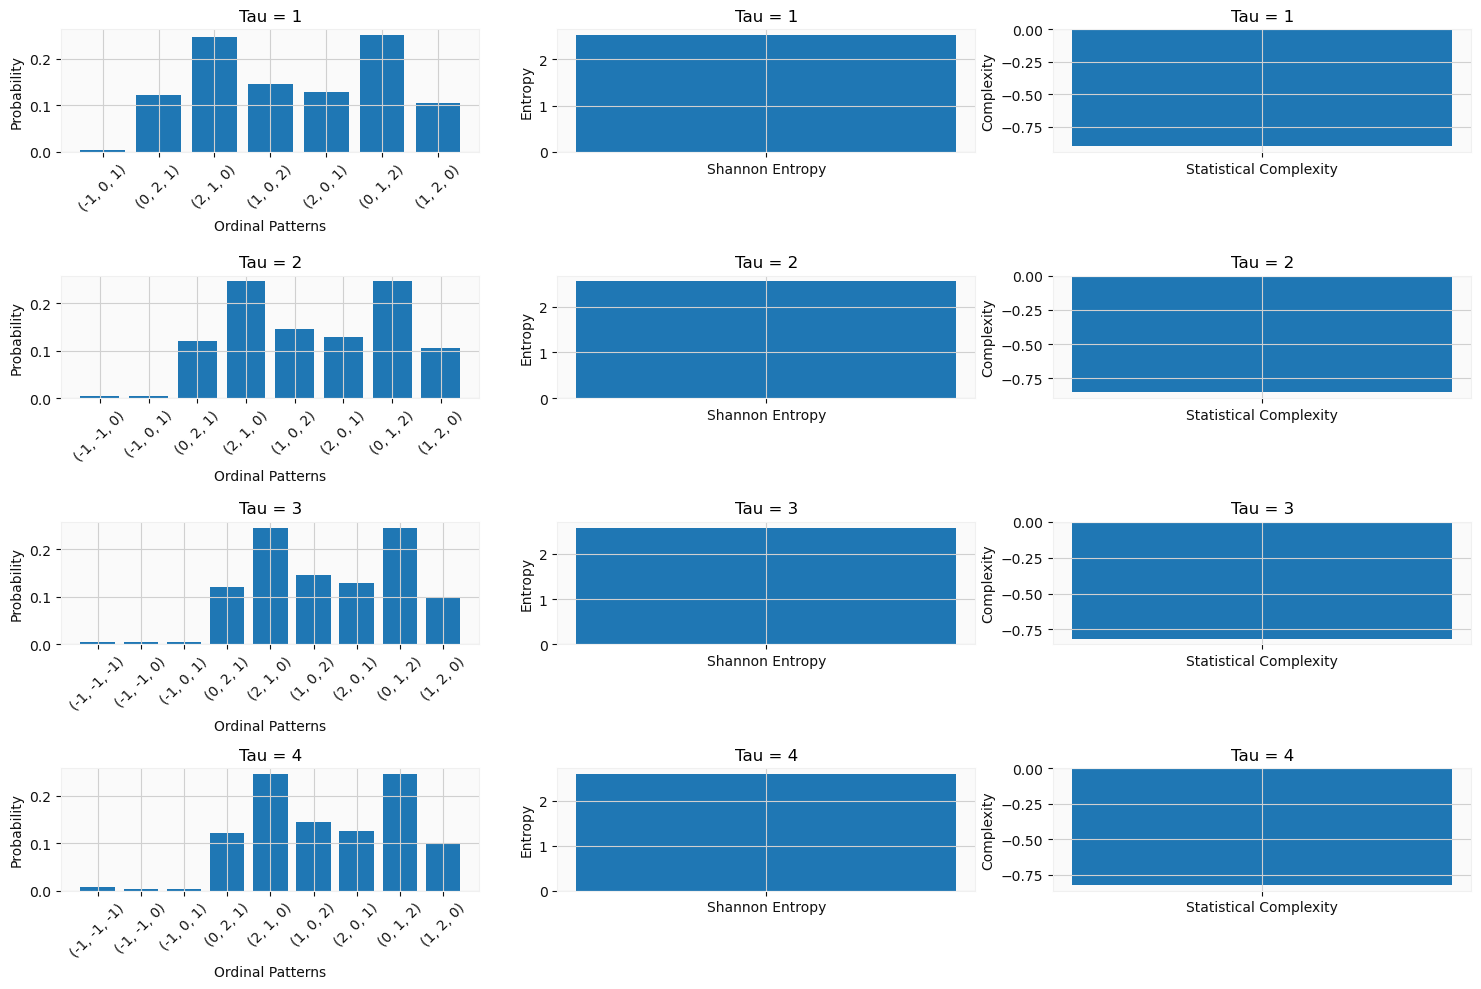

In [21]:
# Create subplots for each time delay
fig, axes = plt.subplots(len(time_delays), 3, figsize=(15, 10))

for i, tau in enumerate(time_delays):
    delayed_series = df['Adj Close'].shift(periods=tau, fill_value=np.nan)
    
    # Calculate the ordinal pattern distribution for the shifted series
    opd = ordinal_pattern_distribution(delayed_series, window_size)
    
    # Calculate Shannon entropy
    opd_prob = opd
    entropy = shannon_entropy(opd_prob)
    
    # Calculate statistical complexity
    complexity = statistical_complexity(opd_prob, entropy)
    
    # Plot the OPD as a bar chart
    ax_opd = axes[i, 0]
    ax_opd.bar(range(len(opd)), opd.values(), tick_label=[str(p) for p in opd.keys()])
    ax_opd.set_title(f"Tau = {tau}")
    ax_opd.set_xlabel("Ordinal Patterns")
    ax_opd.set_ylabel("Probability")
    ax_opd.set_xticklabels(ax_opd.get_xticklabels(), rotation=45)

    # Plot Shannon entropy
    ax_entropy = axes[i, 1]
    ax_entropy.bar(1, entropy, tick_label=['Shannon Entropy'], width=0.5)
    ax_entropy.set_title(f"Tau = {tau}")
    ax_entropy.set_ylabel("Entropy")

    # Plot statistical complexity
    ax_complexity = axes[i, 2]
    ax_complexity.bar(1, complexity, tick_label=['Statistical Complexity'], width=0.5)
    ax_complexity.set_title(f"Tau = {tau}")
    ax_complexity.set_ylabel("Complexity")

plt.tight_layout()
plt.show()
